In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('data.csv')
df.drop([0,1,2],inplace=True)
df.drop('so2',axis=1,inplace=True)
df.drop(['start','end'],axis=1,inplace=True)
df.drop(['o3', 'co','nox'],axis=1,inplace=True)


df

,pm2.5,pm10,temp,bp,rh,ws
3,565.0,718.0,34.0,740.0,85.0,1.0
4,565.0,718.0,34.0,740.0,85.0,0.7
5,565.0,NaN,33.0,740.0,84.0,1.2
6,565.0,718.0,32.0,740.0,85.0,0.6
7,334.0,449.0,34.0,740.0,86.0,0.4
...,...,...,...,...,...,...
8426,5.0,24.0,27.0,742.0,49.0,2.9
8427,6.0,28.0,27.0,742.0,50.0,2.3
8428,6.0,28.0,27.0,742.0,53.0,1.6
8429,6.0,28.0,27.0,742.0,54.0,1.7


In [3]:
df.isnull().sum()
df.dropna(subset=['pm2.5', 'pm10'],inplace=True)


In [4]:
df.dtypes
df.dropna(subset=['temp','bp','rh','ws'],inplace=True)
df.isnull().sum()


pm2.5    0
pm10     0
temp     0
bp       0
rh       0
ws       0
dtype: int64

In [50]:
# df['pm10'].fillna(df['pm10'].mean(),inplace=True)
# df['pm2.5'].fillna(df['pm2.5'].mean(),inplace=True)
df['co'].fillna(df['co'].mean(),inplace=True)
df['o3'].fillna(df['o3'].mean(),inplace=True)
df['nox'].fillna(df['nox'].mean(),inplace=True)
# df['temp'].fillna(df['temp'].mean(),inplace=True)
# df['rh'].fillna(df['rh'].mean(),inplace=True)
# df['ws'].fillna(df['ws'].mean(),inplace=True)
# df['bp'].fillna(df['bp'].mean(),inplace=True)
# df['so2'].fillna(df['so2'].mean(),inplace=True)

In [71]:
#df['pm10'].iloc[0]=760
df['o3'].iloc[0]=0.6
# a=df['pm2.5']
# a.fillna(0,inplace=True)
# c=df['pm10']
# c.fillna(0,inplace=True)
b=df['co']
b.fillna(0,inplace=True)
d=df['o3']
d.fillna(0,inplace=True)
e=df['nox']
e.fillna(0,inplace=True)
# f=df['temp']
# f.fillna(0,inplace=True)
# g=df['rh']
# g.fillna(0,inplace=True)
# h=df['ws']
# h.fillna(0,inplace=True)
# j=df['so2']
# j.fillna(0,inplace=True)


for i in range(0,7449):
   
#     if (a.iloc[i]==0):
#         a.iloc[i]=a.iloc[i-1]    #filling previoyus data
    
#     if (c.iloc[i]==0):
#         c.iloc[i]=c.iloc[i-1]
    
    if (b.iloc[i]==0):
        b.iloc[i]=b.iloc[i-1]
    
    if (d.iloc[i]==0):
        d.iloc[i]=d.iloc[i-1]
        
    if (e.iloc[i]==0):
        e.iloc[i]=e.iloc[i-1]
        
#     if (f.iloc[i]==0):
#         f.iloc[i]=f.iloc[i-1]
    
#     if (g.iloc[i]==0):
#         g.iloc[i]=g.iloc[i-1]
    
#     if (h.iloc[i]==0):
#         h.iloc[i]=h.iloc[i-1]
    
#     if (j.iloc[i]==0):
#         j.iloc[i]=j.iloc[i-1]
   

In [5]:
df.isnull().sum()


pm2.5    0
pm10     0
temp     0
bp       0
rh       0
ws       0
dtype: int64

In [6]:
df.describe()

,pm2.5,pm10,temp,bp,rh,ws
count,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,123.536991,208.733272,30.623216,740.530313,65.592903,1.664423
std,90.085514,125.316455,1.827058,4.668478,17.495129,0.987604
min,2.000000,13.000000,25.000000,714.000000,16.000000,0.300000
25%,61.000000,128.000000,29.000000,741.000000,53.000000,0.900000
50%,102.000000,184.000000,31.000000,741.000000,67.000000,1.600000
75%,162.000000,261.000000,32.000000,742.000000,80.000000,2.300000
max,726.000000,959.000000,35.000000,743.000000,99.000000,5.700000


In [21]:
df.to_csv('DataV.2.csv',index=False)

In [8]:
df.columns

Index(['pm2.5', 'pm10', 'temp', 'bp', 'rh', 'ws'], dtype='object')

In [9]:
Y=df['pm2.5']

In [10]:
X=df[['pm10', 'temp','bp', 'rh', 'ws']]
#X=df[['pm10','rh']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split( X,Y, test_size=0.3, random_state=34)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm=LinearRegression()

In [15]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.coef_

array([ 0.66164572,  0.21794737, -0.34966979,  0.92381487,  2.40023582])

In [17]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'predicted values')

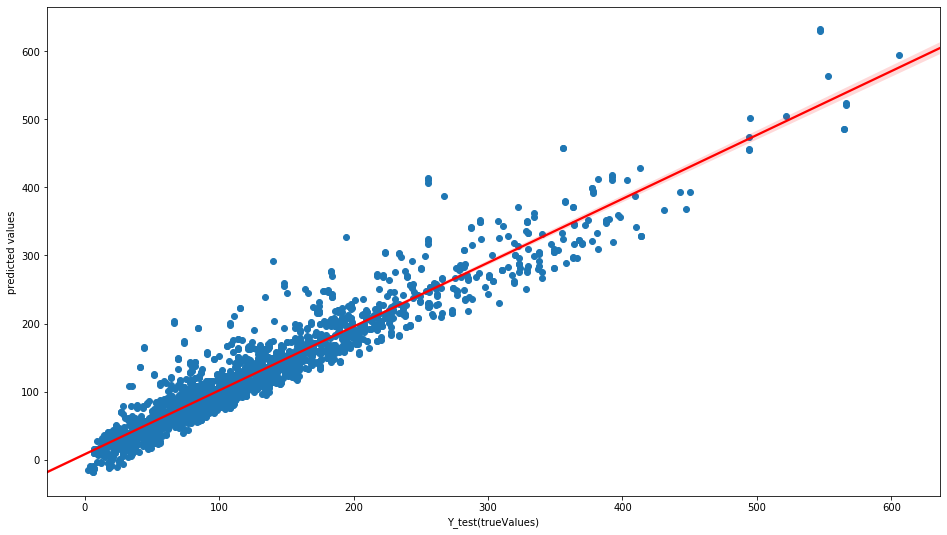

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(Y_test,predictions)
sns.regplot(Y_test,predictions,scatter=False,color='red')
plt.xlabel('Y_test(trueValues)')
plt.ylabel('predicted values')


In [19]:
from sklearn import metrics

In [20]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 18.43568892575534
MSE 696.0236343467142
RMSE 26.382259841543412
